# Pandas introduction


##Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset ficticio
data_students = {
    "peso": pd.Series([55, 68, 74, 60, 72], index=["Ana", "Carlos", "Daniela", "Eduardo", "Fernanda"]),
    "altura": pd.Series([162, 175, 168, 180, 170], index=["Ana", "Carlos", "Daniela", "Eduardo", "Fernanda"]),
    "promedio": pd.Series([4.5, 3.8, 4.2, 2.9, 3.5], index=["Ana", "Carlos", "Daniela", "Eduardo", "Fernanda"]),
    "edad": pd.Series([17, 18, 17, 19, 18], index=["Ana", "Carlos", "Daniela", "Eduardo", "Fernanda"])
}

df = pd.DataFrame(data_students)
print(df)

          peso  altura  promedio  edad
Ana         55     162       4.5    17
Carlos      68     175       3.8    18
Daniela     74     168       4.2    17
Eduardo     60     180       2.9    19
Fernanda    72     170       3.5    18


### Crear una Serie con los nombres y alturas de los estudiantes

In [81]:
serie = pd.Series(data_students["altura"], index=["Ana", "Carlos", "Daniela", "Eduardo", "Fernanda"])
print(serie)

Ana         162
Carlos      175
Daniela     168
Eduardo     180
Fernanda    170
dtype: int64


###Pregunta: ¿Cuál es la altura de Daniela?

In [82]:
height = serie["Daniela"]
print(height)

168


###Accede al promedio de calificación de Carlos de 3 formas diferentes:

In [83]:
df.iloc[1:2, 2]

,promedio
Carlos,3.8


In [84]:
prom = df["promedio"]["Carlos"]
print(prom)

3.8


### Filtra a los estudiantes con promedio mayor o igual a 4.0

In [85]:
filter = df["promedio"] >= 4.0
df[filter]

,peso,altura,promedio,edad
Ana,55,162,4.5,17
Daniela,74,168,4.2,17


### Pregunta: ¿Cuántos estudiantes tienen un buen promedio?

In [129]:
count = df["promedio"] >= 4.0
print(count.sum())

2


### Calcula operaciones estadísticas:

In [87]:
df.describe()

,peso,altura,promedio,edad
count,5.000000,5.000000,5.000000,5.00000
mean,65.800000,171.000000,3.780000,17.80000
std,8.074652,6.855655,0.622093,0.83666
min,55.000000,162.000000,2.900000,17.00000
25%,60.000000,168.000000,3.500000,17.00000
50%,68.000000,170.000000,3.800000,18.00000
75%,72.000000,175.000000,4.200000,18.00000
max,74.000000,180.000000,4.500000,19.00000


### Agrega una nueva columna que indique si el estudiante es mayor de edad

In [93]:
df2 = df.copy()
df2["is_adult"] = df2["edad"] >= 18
print(df2)

          peso  altura  promedio  edad  is_adult
Ana         55     162       4.5    17     False
Carlos      68     175       3.8    18      True
Daniela     74     168       4.2    17     False
Eduardo     60     180       2.9    19      True
Fernanda    72     170       3.5    18      True


### Agrega una columna con el año de nacimiento (suponiendo que estamos en 2025)

In [118]:
df3 = df2.copy()
df3["year_of_birth"] = 2025 - df["edad"]
print(df3)

          peso  altura  promedio  edad  is_adult  year_of_birth
Ana         55     162       4.5    17     False           2008
Carlos      68     175       3.8    18      True           2007
Daniela     74     168       4.2    17     False           2008
Eduardo     60     180       2.9    19      True           2006
Fernanda    72     170       3.5    18      True           2007


### Visualiza los promedios de los estudiantes en un gráfico

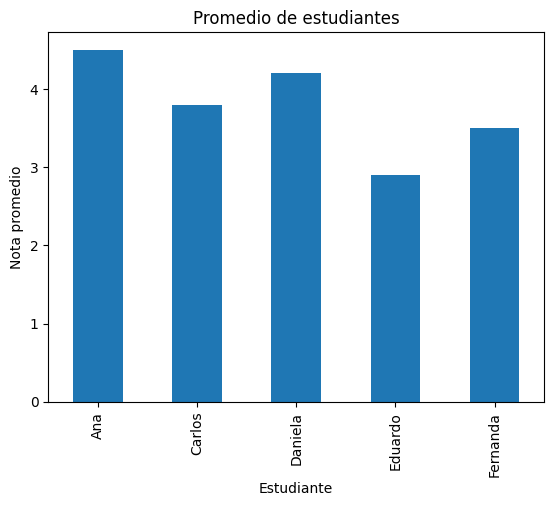

In [119]:
df["promedio"].plot(kind="bar", title="Promedio de estudiantes")
plt.xlabel("Estudiante")
plt.ylabel("Nota promedio")
plt.show()

### Filtra a los estudiantes con altura entre 165 y 175 cm

In [121]:
height_filter = (df3['altura'] >= 165) & (df3['altura'] <=175)
df3[height_filter]

,peso,altura,promedio,edad,is_adult,year_of_birth
Carlos,68,175,3.8,18,True,2007
Daniela,74,168,4.2,17,False,2008
Fernanda,72,170,3.5,18,True,2007


### Copia el DataFrame y elimina la columna "peso"

In [122]:
df4 = df3.copy()
df4.drop(columns=["peso"], inplace=True)
print(df4)
# del df3["peso"]
# print(df3)

          altura  promedio  edad  is_adult  year_of_birth
Ana          162       4.5    17     False           2008
Carlos       175       3.8    18      True           2007
Daniela      168       4.2    17     False           2008
Eduardo      180       2.9    19      True           2006
Fernanda     170       3.5    18      True           2007


###Crea un nuevo DataFrame con solo 3 columnas: nombre, edad y año de nacimiento

In [123]:
df5 = df4[["edad", "year_of_birth"]]
print(df5)

          edad  year_of_birth
Ana         17           2008
Carlos      18           2007
Daniela     17           2008
Eduardo     19           2006
Fernanda    18           2007
